In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


SCROLL TO THE LAST CELLBLOCK! The first part is just the separate stuff. 


The first block of code identifies "control" and "calibrator" testids that are the same. 

In [2]:
import pandas as pd

# Read the data
df = pd.read_csv('1.1seconddataset.csv')

# Filter rows where 'sampletypename' is either 'control' or 'calibrator'
df_filtered = df[df['sampletypename'].isin(['Control', 'Calibrator'])]

# Group by 'testid' and get the count of each test ID
sample_groups = df_filtered.groupby('testid').size()

# Filter to only include test IDs that appear more than once (same test ID in multiple rows)
duplicate_sample_groups = sample_groups[sample_groups > 1]

# Print out the test IDs that have duplicates along with their counts
print("Test IDs that appear more than once (with 'control' or 'calibrator' sample type):")
print(duplicate_sample_groups)





Test IDs that appear more than once (with 'control' or 'calibrator' sample type):
testid
311322      2
311323      2
311324      2
311325      2
311326      2
           ..
11994793    2
11994794    2
11994795    2
11994796    2
11994800    2
Length: 426, dtype: int64


This block compares calibrator data. I ensured that they were from the same reagent lot 

In [3]:
import pandas as pd

# Read the data
df = pd.read_csv('1.1seconddataset.csv')

# Check column names to ensure correct naming
print("Columns in the dataset:", df.columns)

# Filter rows where 'sampletypename' is 'Calibrator' (omit 'Control')
df = df[df['sampletypename'] == 'Calibrator']

# Group by both 'testid' and 'assaynumber' to calculate the max and min of 'correctedcount' for each group, keeping the reagentmasterlotnumber as well
test_groups = df.groupby(['testid', 'assaynumber']).agg(
    min_value=('correctedcount', 'min'),
    max_value=('correctedcount', 'max'),
    min_lot=('reagentmasterlotnumber', 'first'),  # Get the reagentmasterlotnumber for the minimum value
    max_lot=('reagentmasterlotnumber', 'first')   # Get the reagentmasterlotnumber for the maximum value
)

# Filter out the test groups where the min value is 0, 1, or less than 1000 to avoid infinite or trivial percent differences
test_groups = test_groups[(test_groups['min_value'] != 0) & (test_groups['min_value'] != 1) & (test_groups['min_value'] > 1000)]

# Calculate the percent difference between max and min values for each testid and assaynumber combination
test_groups['percent_difference'] = ((test_groups['max_value'] - test_groups['min_value']) / test_groups['min_value']) * 100

# Filter out rows where the percent difference is 0 or greater than 100
test_groups = test_groups[(test_groups['percent_difference'] != 0)]

# Sort the test groups by the highest percent difference
sorted_test_groups = test_groups.sort_values(by='percent_difference', ascending=False)

# Show the test groups with the largest percent difference (excluding min values of 0 or 1, percent difference == 0, percent difference > 1000, and only 'calibrator' sample types)
print("Test groups with the largest percent difference (excluding min values of 0 or 1, percent difference == 0, percent difference > 1000, and 'calibrator' sample types):")
print(sorted_test_groups[['percent_difference', 'min_lot', 'max_lot']])


Columns in the dataset: Index(['datetimestamplocal', 'moduleserialnumber', 'assaynumber',
       'sampletypename', 'testid', 'correctedcount', 'reagentmasterlotnumber',
       'controllotnumber', 'SID'],
      dtype='object')
Test groups with the largest percent difference (excluding min values of 0 or 1, percent difference == 0, percent difference > 1000, and 'calibrator' sample types):
Empty DataFrame
Columns: [percent_difference, min_lot, max_lot]
Index: []


This block compares control data. I am a little confused though because I was under the impression that these controls were tested one after the other. But some of the repeating ones are tested on different dates? I don't know if we should compare them. This is JUST FOR THE first data set though. This may be different for the big one. 

In [95]:
import pandas as pd

# Read the data
df = pd.read_csv('1.1real.csv')

# Check column names to ensure correct naming
print("Columns in the dataset:", df.columns)

# Filter rows where 'sampletypename' is 'Control' (omit 'Calibrator')
df = df[df['sampletypename'] == 'Control']

# Group by both 'testid' and 'assaynumber' and calculate the max and min of 'correctedcount' for each group
test_groups = df.groupby(['testid', 'assaynumber'])['correctedcount'].agg(['max', 'min'])

# Filter out the test groups where the min value is 0, 1, or less than 1000 to avoid infinite or trivial percent differences
test_groups = test_groups[(test_groups['min'] != 0) & (test_groups['min'] != 1) & (test_groups['min'] > 1000)]

# Calculate the percent difference between max and min values for each testid and assaynumber combination
test_groups['percent_difference'] = ((test_groups['max'] - test_groups['min']) / test_groups['min']) * 100

# Filter out rows where the percent difference is 0 or greater than 100
test_groups = test_groups[(test_groups['percent_difference'] != 0) ]

# Sort the test groups by the highest percent difference
sorted_test_groups = test_groups.sort_values(by='percent_difference', ascending=False)

# Show the test groups with the largest percent difference (excluding min values of 0 or 1, percent difference == 0, percent difference > 1000, and only 'control' sample types)
print("Test groups with the largest percent difference (excluding min values of 0 or 1, percent difference == 0, percent difference > 1000, and 'control' sample types):")
print(sorted_test_groups[['percent_difference']])


Columns in the dataset: Index(['datetimestamplocal', 'moduleserialnumber', 'assaynumber',
       'sampletypename', 'testid', 'correctedcount', 'reagentmasterlotnumber',
       'controllotnumber', 'SID'],
      dtype='object')
Test groups with the largest percent difference (excluding min values of 0 or 1, percent difference == 0, percent difference > 1000, and 'control' sample types):
                      percent_difference
testid   assaynumber                    
4973794  468                62939.916260
11994781 248                 1593.553932
5646875  468                  964.596707
11994792 248                  451.462441
4973793  468                  356.213018
5646874  468                   15.893588


This plots only control data

/var/folders/_1/7hwrd93x58sfzq0d8jbx4qcr0000gn/T/ipykernel_60453/1083314895.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['datetimestamplocal'] = pd.to_datetime(df_filtered['datetimestamplocal'], format='%m/%d/%Y %H:%M', errors='coerce')
/var/folders/_1/7hwrd93x58sfzq0d8jbx4qcr0000gn/T/ipykernel_60453/1083314895.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['datetimestamplocal'] = pd.to_datetime(df_filtered['datetimestamplocal'], format='%m/%d/%Y %H:%M', errors='coerce'

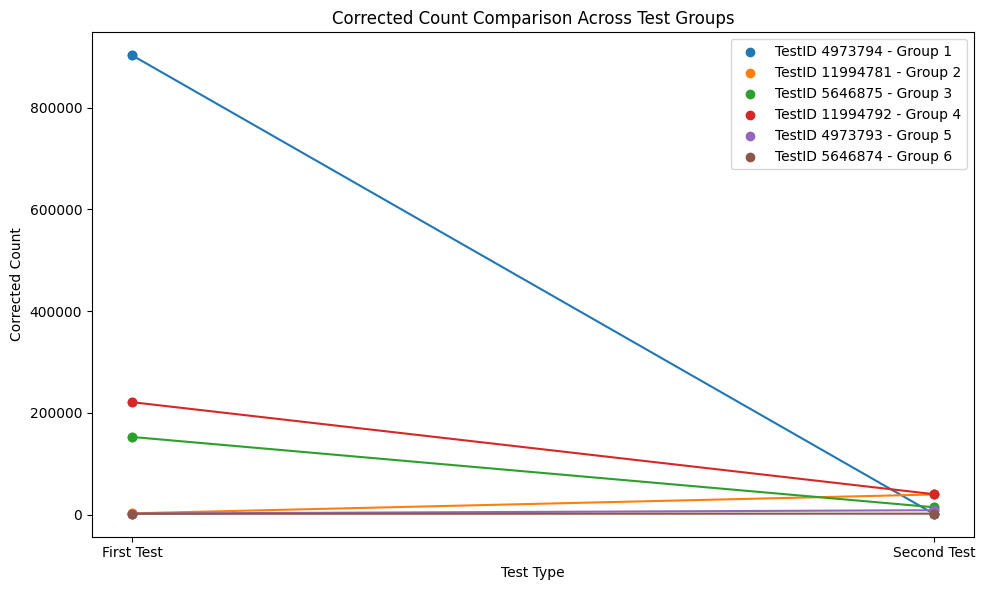

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('1.1real.csv')

# Strip any leading/trailing whitespace from the 'testid' column to avoid mismatches
df['testid'] = df['testid'].astype(str).str.strip()

# Function to filter and plot test data
def plot_test_data(testid, label):
    df_filtered = df[df['testid'] == testid]

    if len(df_filtered) != 2:
        print(f"Error: There are not exactly two tests for testid '{testid}'. Found {len(df_filtered)} tests.")
    else:
        # Ensure 'datetimestamplocal' is in datetime format for proper sorting
        df_filtered['datetimestamplocal'] = pd.to_datetime(df_filtered['datetimestamplocal'], format='%m/%d/%Y %H:%M', errors='coerce')

        # Drop rows where 'datetimestamplocal' or 'correctedcount' are NaT or NaN
        df_filtered = df_filtered.dropna(subset=['datetimestamplocal', 'correctedcount'])

        # Ensure 'correctedcount' is numeric
        df_filtered['correctedcount'] = pd.to_numeric(df_filtered['correctedcount'], errors='coerce')

        # Drop rows where 'correctedcount' is NaN
        df_filtered = df_filtered.dropna(subset=['correctedcount'])

        if len(df_filtered) == 2:
            # Sort by 'datetimestamplocal' to identify the first and second test
            df_filtered = df_filtered.sort_values(by='datetimestamplocal')

            # Add a column to label the tests as "First Test" and "Second Test"
            df_filtered['test_type'] = ['First Test', 'Second Test']

            # Extract the relevant columns for plotting
            df_plot = df_filtered[['test_type', 'correctedcount']]

            # Plot the data points (scatter)
            plt.scatter(df_plot['test_type'], df_plot['correctedcount'], label=f'TestID {testid} - {label}')

            # Connect the points with a line
            plt.plot(df_plot['test_type'], df_plot['correctedcount'], linestyle='-', marker='o')

# List of test IDs you want to plot (copy and paste your list of test IDs here)
test_ids_to_plot = [
    '4973794', '11994781', '5646875', '11994792', '4973793', '5646874'
]

# Plot data for all test IDs in the list
plt.figure(figsize=(10, 6))

# Loop over each test ID and plot it
for idx, testid in enumerate(test_ids_to_plot):
    plot_test_data(testid, f'Group {idx+1}')  # You can customize the label format as needed

# Customize the plot
plt.title('Corrected Count Comparison Across Test Groups')
plt.xlabel('Test Type')
plt.ylabel('Corrected Count')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()







USE THIS CELL BELOW


Test IDs that appear more than once (with 'calibrator' sample type):
testid
663840    2
663841    2
663842    2
663843    2
663844    2
663845    2
663846    2
663847    2
663848    2
663849    2
663850    2
663851    2
664046    2
664047    2
dtype: int64

Test IDs that appear more than once (with 'control' sample type):
testid
11994776    2
11994777    2
11994778    2
11994779    2
11994780    2
           ..
877438      2
877441      2
877442      2
877443      2
877444      2
Length: 91, dtype: int64

Test groups with the largest percent difference ('control' sample types):
                      percent_difference
testid   assaynumber                    
4973794  468                62939.916260
11994781 248                 1593.553932
5646875  468                  964.596707
11994792 248                  451.462441
4973793  468                  356.213018
5646874  468                   15.893588

Test IDs: '11994781', '11994792', '4973794', '5646874', '5646875', '4973793'


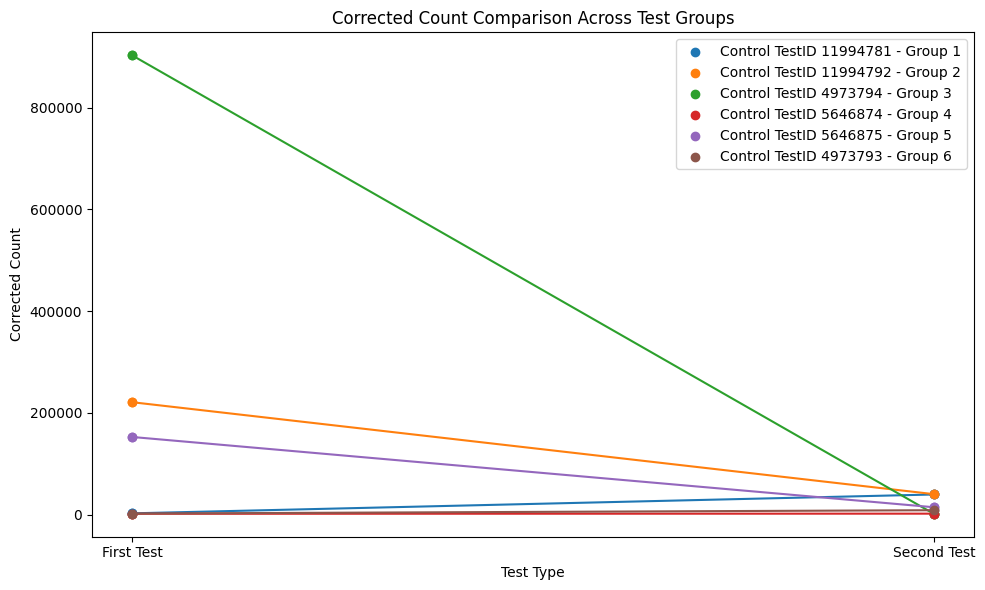

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('1.1real.csv')

# Strip any leading/trailing whitespace from 'testid' to avoid mismatches
df['testid'] = df['testid'].astype(str).str.strip()

# ---- Part 1: Filtering and Counting Test IDs ----
# Drop rows where 'correctedcount' is NaN
df = df.dropna(subset=['correctedcount'])

# Filter rows for 'Control' and 'Calibrator' separately
df_calibrator = df[df['sampletypename'] == 'Calibrator']
df_control = df[df['sampletypename'] == 'Control']

# Group by 'testid' and get the count of each test ID for calibrators
sample_groups_calibrator = df_calibrator.groupby('testid').size()

# Group by 'testid' and get the count of each test ID for controls
sample_groups_control = df_control.groupby('testid').size()

# Filter to only include test IDs that appear more than once for calibrators
duplicate_sample_groups_calibrator = sample_groups_calibrator[sample_groups_calibrator > 1]

# Filter to only include test IDs that appear more than once for controls
duplicate_sample_groups_control = sample_groups_control[sample_groups_control > 1]

# Print out the test IDs that have duplicates for calibrators
if not duplicate_sample_groups_calibrator.empty:
    print("\nTest IDs that appear more than once (with 'calibrator' sample type):")
    print(duplicate_sample_groups_calibrator)

# Print out the test IDs that have duplicates for controls
if not duplicate_sample_groups_control.empty:
    print("\nTest IDs that appear more than once (with 'control' sample type):")
    print(duplicate_sample_groups_control)


# ---- Part 2: Percent Difference for Calibrator Samples ----
# Filter rows where 'sampletypename' is 'Calibrator'
df_calibrator = df[df['sampletypename'] == 'Calibrator']

# Group by both 'testid' and 'assaynumber' and calculate the max and min of 'correctedcount' for each group
test_groups_calibrator = df_calibrator.groupby(['testid', 'assaynumber']).agg(
    min_value=('correctedcount', 'min'),
    max_value=('correctedcount', 'max'),
    min_lot=('reagentmasterlotnumber', 'first'),
    max_lot=('reagentmasterlotnumber', 'first')
)

# Filter out the test groups where the min value is 0, 1, or less than 1000 to avoid infinite or trivial percent differences
test_groups_calibrator = test_groups_calibrator[
    (test_groups_calibrator['min_value'] != 0) & 
    (test_groups_calibrator['min_value'] != 1) & 
    (test_groups_calibrator['min_value'] > 1000)
]

# Calculate the percent difference between max and min values for each testid and assaynumber combination
test_groups_calibrator['percent_difference'] = ((test_groups_calibrator['max_value'] - test_groups_calibrator['min_value']) / test_groups_calibrator['min_value']) * 100

# Filter out rows where the percent difference is 0
test_groups_calibrator = test_groups_calibrator[test_groups_calibrator['percent_difference'] != 0]

# Sort the test groups by the highest percent difference
sorted_test_groups_calibrator = test_groups_calibrator.sort_values(by='percent_difference', ascending=False)

# Print the test groups with the largest percent difference (excluding trivial cases)
if not sorted_test_groups_calibrator.empty:
    print("\nTest groups with the largest percent difference ('calibrator' sample types):")
    print(sorted_test_groups_calibrator[['percent_difference', 'min_lot', 'max_lot']])


# ---- Part 3: Percent Difference for Control Samples ----
# Filter rows where 'sampletypename' is 'Control'
df_control = df[df['sampletypename'] == 'Control']

# Group by both 'testid' and 'assaynumber' and calculate the max and min of 'correctedcount' for each group
test_groups_control = df_control.groupby(['testid', 'assaynumber'])['correctedcount'].agg(['max', 'min'])

# Filter out the test groups where the min value is 0, 1, or less than 1000
test_groups_control = test_groups_control[
    (test_groups_control['min'] != 0) & 
    (test_groups_control['min'] != 1) & 
    (test_groups_control['min'] > 1000)
]

# Calculate the percent difference between max and min values for each testid and assaynumber combination
test_groups_control['percent_difference'] = ((test_groups_control['max'] - test_groups_control['min']) / test_groups_control['min']) * 100

# Filter out rows where the percent difference is 0
test_groups_control = test_groups_control[test_groups_control['percent_difference'] != 0]

# Sort the test groups by the highest percent difference
sorted_test_groups_control = test_groups_control.sort_values(by='percent_difference', ascending=False)

# Print the test groups with the largest percent difference ('control' sample types)
if not sorted_test_groups_control.empty:
    print("\nTest groups with the largest percent difference ('control' sample types):")
    print(sorted_test_groups_control[['percent_difference']])


# ---- Part 4: Plotting Data

# List of test IDs you want to plot (from both calibrator and control test groups)
test_ids_to_plot_calibrator = sorted_test_groups_calibrator.index.get_level_values('testid').unique()
test_ids_to_plot_control = sorted_test_groups_control.index.get_level_values('testid').unique()

# Combine both lists of test IDs (calibrator and control)
test_ids_to_plot = set(test_ids_to_plot_calibrator).union(test_ids_to_plot_control)

# Print the list of test IDs in the desired format
test_ids_str = "', '".join(list(test_ids_to_plot))  # Convert set to list first
print(f"\nTest IDs: '{test_ids_str}'")

# Function to filter and plot test data
def plot_test_data(testid, label, sample_type):
    df_filtered = df[df['testid'] == testid]
    df_filtered = df_filtered[df_filtered['sampletypename'] == sample_type]

    if len(df_filtered) != 2:
        print(f"Error: There are not exactly two tests for testid '{testid}'. Found {len(df_filtered)} tests.")
    else:
        # Ensure 'datetimestamplocal' is in datetime format for proper sorting
        df_filtered['datetimestamplocal'] = pd.to_datetime(df_filtered['datetimestamplocal'], format='%m/%d/%Y %H:%M', errors='coerce')

        # Drop rows where 'datetimestamplocal' or 'correctedcount' are NaT or NaN
        df_filtered = df_filtered.dropna(subset=['datetimestamplocal', 'correctedcount'])

        # Ensure 'correctedcount' is numeric
        df_filtered['correctedcount'] = pd.to_numeric(df_filtered['correctedcount'], errors='coerce')

        # Drop rows where 'correctedcount' is NaN
        df_filtered = df_filtered.dropna(subset=['correctedcount'])

        if len(df_filtered) == 2:
            # Sort by 'datetimestamplocal' to identify the first and second test
            df_filtered = df_filtered.sort_values(by='datetimestamplocal')

            # Add a column to label the tests as "First Test" and "Second Test"
            df_filtered['test_type'] = ['First Test', 'Second Test']

            # Extract the relevant columns for plotting
            df_plot = df_filtered[['test_type', 'correctedcount']]

            # Plot the data points (scatter)
            plt.scatter(df_plot['test_type'], df_plot['correctedcount'], label=f'{sample_type} TestID {testid} - {label}')

            # Connect the points with a line
            plt.plot(df_plot['test_type'], df_plot['correctedcount'], linestyle='-', marker='o')

# Plot data for all test IDs in the list (calibrators and controls)
plt.figure(figsize=(10, 6))

# Loop over each test ID and plot it for both 'Calibrator' and 'Control'
for idx, testid in enumerate(test_ids_to_plot):
    # Plot for calibrator only
    if testid in test_ids_to_plot_calibrator:
        plot_test_data(testid, f'Group {idx+1}', sample_type='Calibrator')
    # Plot for control only
    if testid in test_ids_to_plot_control:
        plot_test_data(testid, f'Group {idx+1}', sample_type='Control')

# Customize the plot
plt.title('Corrected Count Comparison Across Test Groups')
plt.xlabel('Test Type')
plt.ylabel('Corrected Count')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()





UnicodeDecodeError for 5.1real.csv, trying 'latin1' encoding...
UnicodeDecodeError for 6.1real.csv, trying 'latin1' encoding...

Test IDs: '4985022', '1149459', '392408', '2921099', '3343677', '172791', '483309', '549466', '438013', '411883', '284512', '557502', '911533', '1078720', '372855', '240163', '938146', '506031', '447408', '858522', '547524', '229058', '3502740', '4146844', '8540888', '4406856', '253841', '1810958', '1631133', '1658659', '240164', '245013', '399389', '404072', '843146', '762961', '1164249', '2914825', '3610845', '3812201', '1787455', '11994781', '2819645', '175601', '911550', '3204585', '316535', '538153', '6407325', '2032529', '2020871', '401362', '5600585', '1005057', '1788870', '1787442', '6982626', '2590058', '2501965', '365956', '839118', '3247613', '1704272', '172798', '2928595', '317170', '546934', '1805926', '3427627', '2387890', '482175', '557501', '6143723', '610221', '717513', '858321', '5949340', '7404685', '175970', '7524099', '781480', '255866', 

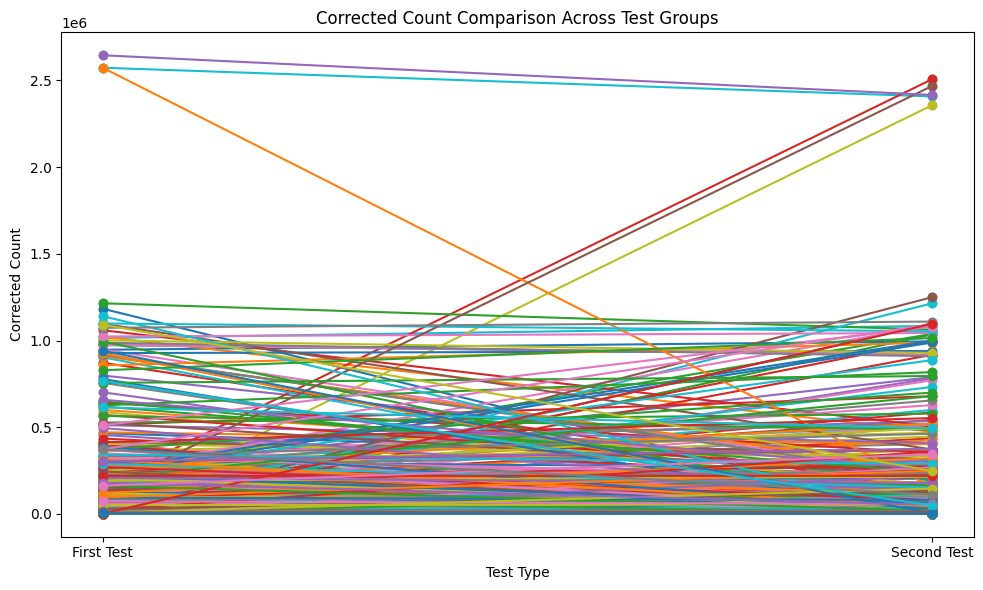


Test IDs with 3 tests: 483309, 253841, 1810958, 175601, 911550, 2590058, 365956, 546934, 2387890, 482175, 610221, 175970, 551899, 1808476, 784117, 241583, 611253, 911559, 911577, 1688143, 8190, 784097, 391658, 893571, 1688151, 219836, 911560, 911553, 391665, 169826, 438012, 400458, 1078705, 852499, 238291, 483303, 852501, 546920, 391661, 911562, 391660, 214688, 2172950, 1808478, 241584, 284503, 391659, 1128891, 154573, 284286, 784099, 601830, 852500, 592433, 3839035, 219823, 1688154, 478886, 592432, 131520, 784091, 1078714, 1078704, 567653, 1688144, 413306, 391687, 365954, 365955, 391667, 911561, 478885


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of CSV files to read
csv_files = ['1.1real.csv','1.2real.csv','2.1real.csv','2.2real.csv','3.1real.csv','3.2real.csv','4.1real.csv','4.2real.csv','5.1real.csv','5.2real.csv','6.1real.csv','6.2real.csv','7.1real.csv','7.2real.csv']
# Empty DataFrame to store combined data
df_combined = pd.DataFrame()

# Loop through the CSV files and concatenate them into the combined DataFrame
for csv_file in csv_files:
    if os.path.exists(csv_file):  # Ensure file exists
        try:
            # Try reading the file with the default encoding (utf-8)
            df = pd.read_csv(csv_file, encoding='utf-8')
        except UnicodeDecodeError:
            # If UnicodeDecodeError occurs, try reading the file with 'latin1' encoding
            print(f"UnicodeDecodeError for {csv_file}, trying 'latin1' encoding...")
            df = pd.read_csv(csv_file, encoding='latin1')
        except Exception as e:
            print(f"Error reading {csv_file}: {e}")
            continue

        # Strip any leading/trailing whitespace from 'testid' to avoid mismatches
        df['testid'] = df['testid'].astype(str).str.strip()

        # Append the data from this file to the combined DataFrame
        df_combined = pd.concat([df_combined, df], ignore_index=True)
    else:
        print(f"Warning: {csv_file} does not exist. Skipping file.")

# ---- Part 1: Filtering and Counting Test IDs ----
# Drop rows where 'correctedcount' is NaN
df_combined = df_combined.dropna(subset=['correctedcount'])

# Filter rows for 'Control' and 'Calibrator' separately
df_calibrator = df_combined[df_combined['sampletypename'] == 'Calibrator']
df_control = df_combined[df_combined['sampletypename'] == 'Control']

# Group by 'testid' and get the count of each test ID for calibrators
sample_groups_calibrator = df_calibrator.groupby('testid').size()

# Group by 'testid' and get the count of each test ID for controls
sample_groups_control = df_control.groupby('testid').size()

# Filter to only include test IDs that appear more than once for calibrators
duplicate_sample_groups_calibrator = sample_groups_calibrator[sample_groups_calibrator > 1]

# Filter to only include test IDs that appear more than once for controls
duplicate_sample_groups_control = sample_groups_control[sample_groups_control > 1]

# ---- Part 2: Percent Difference for Calibrator Samples ----
# Group by both 'testid' and 'assaynumber' and calculate the max and min of 'correctedcount' for each group
test_groups_calibrator = df_calibrator.groupby(['testid', 'assaynumber']).agg(
    min_value=('correctedcount', 'min'),
    max_value=('correctedcount', 'max'),
    min_lot=('reagentmasterlotnumber', 'first'),
    max_lot=('reagentmasterlotnumber', 'first')
)

# Filter out the test groups where the min value is 0, 1, or less than 1000 to avoid infinite or trivial percent differences
test_groups_calibrator = test_groups_calibrator[
    (test_groups_calibrator['min_value'] != 0) & 
    (test_groups_calibrator['min_value'] != 1) & 
    (test_groups_calibrator['min_value'] > 1000)
]

# Calculate the percent difference between max and min values for each testid and assaynumber combination
test_groups_calibrator['percent_difference'] = ((test_groups_calibrator['max_value'] - test_groups_calibrator['min_value']) / test_groups_calibrator['min_value']) * 100

# Filter out rows where the percent difference is 0
test_groups_calibrator = test_groups_calibrator[test_groups_calibrator['percent_difference'] != 0]

# Sort the test groups by the highest percent difference
sorted_test_groups_calibrator = test_groups_calibrator.sort_values(by='percent_difference', ascending=False)

# ---- Part 3: Percent Difference for Control Samples ----
# Group by both 'testid' and 'assaynumber' and calculate the max and min of 'correctedcount' for each group
test_groups_control = df_control.groupby(['testid', 'assaynumber'])['correctedcount'].agg(['max', 'min'])

# Filter out the test groups where the min value is 0, 1, or less than 1000
test_groups_control = test_groups_control[
    (test_groups_control['min'] != 0) & 
    (test_groups_control['min'] != 1) & 
    (test_groups_control['min'] > 1000)
]

# Calculate the percent difference between max and min values for each testid and assaynumber combination
test_groups_control['percent_difference'] = ((test_groups_control['max'] - test_groups_control['min']) / test_groups_control['min']) * 100

# Filter out rows where the percent difference is 0
test_groups_control = test_groups_control[test_groups_control['percent_difference'] != 0]

# Sort the test groups by the highest percent difference
sorted_test_groups_control = test_groups_control.sort_values(by='percent_difference', ascending=False)

# ---- Part 4: Plotting Data

# List of test IDs you want to plot (from both calibrator and control test groups)
test_ids_to_plot_calibrator = sorted_test_groups_calibrator.index.get_level_values('testid').unique()
test_ids_to_plot_control = sorted_test_groups_control.index.get_level_values('testid').unique()

# Combine both lists of test IDs (calibrator and control)
test_ids_to_plot = set(test_ids_to_plot_calibrator).union(test_ids_to_plot_control)

# Print the list of test IDs in the desired format
test_ids_str = "', '".join(list(test_ids_to_plot))  # Convert set to list first
print(f"\nTest IDs: '{test_ids_str}'")

# Collect test IDs with more than 2 tests (3 tests)
test_ids_with_more_than_2 = []

# Function to filter and plot test data
def plot_test_data(testid, label, sample_type):
    df_filtered = df_combined[df_combined['testid'] == testid]
    df_filtered = df_filtered[df_filtered['sampletypename'] == sample_type]

    if len(df_filtered) != 2:
        # Collect test IDs with more than 2 tests
        if len(df_filtered) == 3:
            test_ids_with_more_than_2.append(testid)
    else:
        # Ensure 'datetimestamplocal' is in datetime format for proper sorting
        df_filtered['datetimestamplocal'] = pd.to_datetime(df_filtered['datetimestamplocal'], format='%m/%d/%Y %H:%M', errors='coerce')

        # Drop rows where 'datetimestamplocal' or 'correctedcount' are NaT or NaN
        df_filtered = df_filtered.dropna(subset=['datetimestamplocal', 'correctedcount'])

        # Ensure 'correctedcount' is numeric
        df_filtered['correctedcount'] = pd.to_numeric(df_filtered['correctedcount'], errors='coerce')

        # Drop rows where 'correctedcount' is NaN
        df_filtered = df_filtered.dropna(subset=['correctedcount'])

        if len(df_filtered) == 2:
            # Sort by 'datetimestamplocal' to identify the first and second test
            df_filtered = df_filtered.sort_values(by='datetimestamplocal')

            # Add a column to label the tests as "First Test" and "Second Test"
            df_filtered['test_type'] = ['First Test', 'Second Test']

            # Extract the relevant columns for plotting
            df_plot = df_filtered[['test_type', 'correctedcount']]

            # Plot the data points (scatter)
            plt.scatter(df_plot['test_type'], df_plot['correctedcount'], label=f'{sample_type} TestID {testid} - {label}')

            # Connect the points with a line
            plt.plot(df_plot['test_type'], df_plot['correctedcount'], linestyle='-', marker='o')

# Plot data for all test IDs in the list (calibrators and controls)
plt.figure(figsize=(10, 6))

# Loop over each test ID and plot it for both 'Calibrator' and 'Control'
for idx, testid in enumerate(test_ids_to_plot):
    # Plot for calibrator only
    if testid in test_ids_to_plot_calibrator:
        plot_test_data(testid, f'Group {idx+1}', sample_type='Calibrator')
    # Plot for control only
    if testid in test_ids_to_plot_control:
        plot_test_data(testid, f'Group {idx+1}', sample_type='Control')

# Customize the plot
plt.title('Corrected Count Comparison Across Test Groups')
plt.xlabel('Test Type')
plt.ylabel('Corrected Count')
#plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print the test IDs with more than 2 tests (3 tests)
if test_ids_with_more_than_2:
    print(f"\nTest IDs with 3 tests: {', '.join(test_ids_with_more_than_2)}")



UnicodeDecodeError for 14.2real.csv, trying 'latin1' encoding...

Test IDs: '353670', '115587', '195232', '888747', '1448027', '634286', '34979', '2708684', '44509', '9329', '75212', '76149', '1639468', '488915', '52422', '55141', '661322', '3611', '2778260', '108750', '239851', '739541', '542135', '60359', '20029', '39653', '5240', '78798', '981609', '113978', '33999', '232652', '158117', '50598', '682825', '439210', '179349', '368330', '1415343', '304137', '33177', '355915', '146171', '436346', '27776', '35157', '322544', '2043795', '2016974', '368153', '239884', '1446603', '211628', '19995', '23035', '825796', '2007670', '1415342', '93818', '14913', '33221', '218423', '203113', '3980233', '159167', '17190', '121021', '246447', '32809', '372805', '812831', '28894', '368331', '111478', '344584', '259922', '675762', '32568', '757086', '29675', '89062', '394568', '566328', '1162421', '159176', '130573', '815577', '839232', '78321', '78136', '488405', '33302', '177751', '18200', '990179'

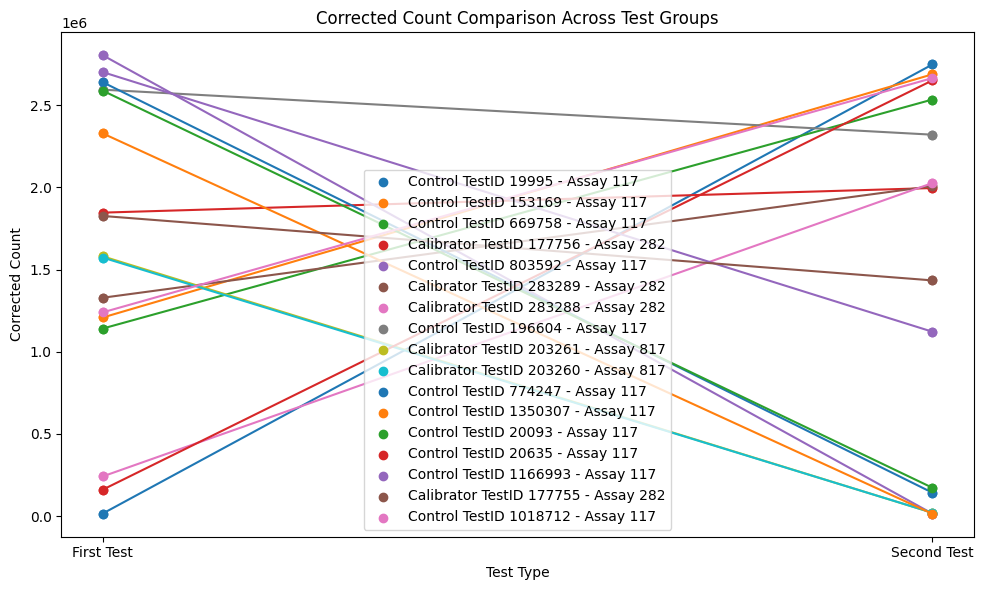


Test IDs with 3 tests: 1162421, 252875, 37263, 305016, 89497, 59932, 19836, 19739, 89498, 20281, 19670, 37262


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of CSV files to read
csv_files = ['11.1real.csv','11.2real.csv','12.1real.csv','12.2real.csv','13.1real.csv','13.2real.csv','14.1real.csv','14.2real.csv','15.1real.csv','15.2real.csv',]
# Empty DataFrame to store combined data
df_combined = pd.DataFrame()

# Loop through the CSV files and concatenate them into the combined DataFrame
for csv_file in csv_files:
    if os.path.exists(csv_file):  # Ensure file exists
        try:
            # Try reading the file with the default encoding (utf-8)
            df = pd.read_csv(csv_file, encoding='utf-8')
        except UnicodeDecodeError:
            # If UnicodeDecodeError occurs, try reading the file with 'latin1' encoding
            print(f"UnicodeDecodeError for {csv_file}, trying 'latin1' encoding...")
            df = pd.read_csv(csv_file, encoding='latin1')
        except Exception as e:
            print(f"Error reading {csv_file}: {e}")
            continue

        # Strip any leading/trailing whitespace from 'testid' to avoid mismatches
        df['testid'] = df['testid'].astype(str).str.strip()

        # Append the data from this file to the combined DataFrame
        df_combined = pd.concat([df_combined, df], ignore_index=True)
    else:
        print(f"Warning: {csv_file} does not exist. Skipping file.")

# ---- Part 1: Filtering and Counting Test IDs ----
# Drop rows where 'correctedcount' is NaN
df_combined = df_combined.dropna(subset=['correctedcount'])

# Filter rows for 'Control' and 'Calibrator' separately
df_calibrator = df_combined[df_combined['sampletypename'] == 'Calibrator']
df_control = df_combined[df_combined['sampletypename'] == 'Control']

# Group by 'testid' and get the count of each test ID for calibrators
sample_groups_calibrator = df_calibrator.groupby('testid').size()

# Group by 'testid' and get the count of each test ID for controls
sample_groups_control = df_control.groupby('testid').size()

# Filter to only include test IDs that appear more than once for calibrators
duplicate_sample_groups_calibrator = sample_groups_calibrator[sample_groups_calibrator > 1]

# Filter to only include test IDs that appear more than once for controls
duplicate_sample_groups_control = sample_groups_control[sample_groups_control > 1]

# ---- Part 2: Percent Difference for Calibrator Samples ----
# Group by both 'testid' and 'assaynumber' and calculate the max and min of 'correctedcount' for each group
test_groups_calibrator = df_calibrator.groupby(['testid', 'assaynumber']).agg(
    min_value=('correctedcount', 'min'),
    max_value=('correctedcount', 'max'),
    min_lot=('reagentmasterlotnumber', 'first'),
    max_lot=('reagentmasterlotnumber', 'first')
)

# Filter out the test groups where the min value is 0, 1, or less than 1000 to avoid infinite or trivial percent differences
test_groups_calibrator = test_groups_calibrator[
    (test_groups_calibrator['min_value'] != 0) & 
    (test_groups_calibrator['min_value'] != 1) & 
    (test_groups_calibrator['min_value'] > 1000)
]

# Calculate the percent difference between max and min values for each testid and assaynumber combination
test_groups_calibrator['percent_difference'] = ((test_groups_calibrator['max_value'] - test_groups_calibrator['min_value']) / test_groups_calibrator['min_value']) * 100

# Filter out rows where the percent difference is 0
test_groups_calibrator = test_groups_calibrator[test_groups_calibrator['percent_difference'] != 0]

# Sort the test groups by the highest percent difference
sorted_test_groups_calibrator = test_groups_calibrator.sort_values(by='percent_difference', ascending=False)

# ---- Part 3: Percent Difference for Control Samples ----
# Group by both 'testid' and 'assaynumber' and calculate the max and min of 'correctedcount' for each group
test_groups_control = df_control.groupby(['testid', 'assaynumber'])['correctedcount'].agg(['max', 'min'])

# Filter out the test groups where the min value is 0, 1, or less than 1000
test_groups_control = test_groups_control[
    (test_groups_control['min'] != 0) & 
    (test_groups_control['min'] != 1) & 
    (test_groups_control['min'] > 1000)
]

# Calculate the percent difference between max and min values for each testid and assaynumber combination
test_groups_control['percent_difference'] = ((test_groups_control['max'] - test_groups_control['min']) / test_groups_control['min']) * 100

# Filter out rows where the percent difference is 0
test_groups_control = test_groups_control[test_groups_control['percent_difference'] != 0]

# Sort the test groups by the highest percent difference
sorted_test_groups_control = test_groups_control.sort_values(by='percent_difference', ascending=False)

# ---- Part 4: Plotting Data

# List of test IDs you want to plot (from both calibrator and control test groups)
test_ids_to_plot_calibrator = sorted_test_groups_calibrator.index.get_level_values('testid').unique()
test_ids_to_plot_control = sorted_test_groups_control.index.get_level_values('testid').unique()

# Combine both lists of test IDs (calibrator and control)
test_ids_to_plot = set(test_ids_to_plot_calibrator).union(test_ids_to_plot_control)

# Print the list of test IDs in the desired format
test_ids_str = "', '".join(list(test_ids_to_plot))  # Convert set to list first
print(f"\nTest IDs: '{test_ids_str}'")

# Collect test IDs with more than 2 tests (3 tests)
test_ids_with_more_than_2 = []

# Threshold value for filtering
threshold = 1.5 * 10**6

# Function to filter and plot test data
def plot_test_data(testid, label, sample_type):
    df_filtered = df_combined[df_combined['testid'] == testid]
    df_filtered = df_filtered[df_filtered['sampletypename'] == sample_type]

    # Debugging print statements
    print(f"Checking TestID {testid} ({sample_type})")
    print(f"Max Corrected Count: {df_filtered['correctedcount'].max()}")
    print(f"Min Corrected Count: {df_filtered['correctedcount'].min()}")

    # Check if any value in 'correctedcount' is above the threshold
    if (df_filtered['correctedcount'] > threshold).any():
        print(f"TestID {testid} has values above threshold ({threshold}). Plotting.")
        
        if len(df_filtered) != 2:
            # Collect test IDs with more than 2 tests
            if len(df_filtered) == 3:
                test_ids_with_more_than_2.append(testid)
        else:
            # Ensure 'datetimestamplocal' is in datetime format for proper sorting
            df_filtered['datetimestamplocal'] = pd.to_datetime(df_filtered['datetimestamplocal'], format='%m/%d/%Y %H:%M', errors='coerce')

            # Drop rows where 'datetimestamplocal' or 'correctedcount' are NaT or NaN
            df_filtered = df_filtered.dropna(subset=['datetimestamplocal', 'correctedcount'])

            # Ensure 'correctedcount' is numeric
            df_filtered['correctedcount'] = pd.to_numeric(df_filtered['correctedcount'], errors='coerce')

            # Drop rows where 'correctedcount' is NaN
            df_filtered = df_filtered.dropna(subset=['correctedcount'])

            if len(df_filtered) == 2:
                # Sort by 'datetimestamplocal' to identify the first and second test
                df_filtered = df_filtered.sort_values(by='datetimestamplocal')

                # Add a column to label the tests as "First Test" and "Second Test"
                df_filtered['test_type'] = ['First Test', 'Second Test']

                # Extract the relevant columns for plotting
                df_plot = df_filtered[['test_type', 'correctedcount', 'assaynumber']]

                # Plot the data points (scatter)
                for assay in df_plot['assaynumber'].unique():
                    # Filter data for each assay number
                    df_assay = df_plot[df_plot['assaynumber'] == assay]
                    plt.scatter(df_assay['test_type'], df_assay['correctedcount'], label=f'{sample_type} TestID {testid} - Assay {assay}')

                # Connect the points with a line
                plt.plot(df_plot['test_type'], df_plot['correctedcount'], linestyle='-', marker='o')
    else:
        print(f"TestID {testid} does NOT have values above threshold ({threshold}). Skipping plotting.")

# Plot data for all test IDs in the list (calibrators and controls)
plt.figure(figsize=(10, 6))

# Loop over each test ID and plot it for both 'Calibrator' and 'Control'
for idx, testid in enumerate(test_ids_to_plot):
    # Plot for calibrator only
    if testid in test_ids_to_plot_calibrator:
        plot_test_data(testid, f'Group {idx+1}', sample_type='Calibrator')
    # Plot for control only
    if testid in test_ids_to_plot_control:
        plot_test_data(testid, f'Group {idx+1}', sample_type='Control')

# Customize the plot
plt.title('Corrected Count Comparison Across Test Groups')
plt.xlabel('Test Type')
plt.ylabel('Corrected Count')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print the test IDs with more than 2 tests (3 tests)
if test_ids_with_more_than_2:
    print(f"\nTest IDs with 3 tests: {', '.join(test_ids_with_more_than_2)}")




In [78]:
import pandas as pd
import os

# List of CSV files to read
csv_files = ['15.2real.csv']
# Empty DataFrame to store combined data
df_combined = pd.DataFrame()

# Loop through the CSV files and concatenate them into the combined DataFrame
for csv_file in csv_files:
    if os.path.exists(csv_file):  # Ensure file exists
        try:
            # Try reading the file with the default encoding (utf-8)
            df = pd.read_csv(csv_file, encoding='utf-8')
        except UnicodeDecodeError:
            # If UnicodeDecodeError occurs, try reading the file with 'latin1' encoding
            print(f"UnicodeDecodeError for {csv_file}, trying 'latin1' encoding...")
            df = pd.read_csv(csv_file, encoding='latin1')
        except Exception as e:
            print(f"Error reading {csv_file}: {e}")
            continue

        # Strip any leading/trailing whitespace from 'testid' to avoid mismatches
        df['testid'] = df['testid'].astype(str).str.strip()

        # Append the data from this file to the combined DataFrame
        df_combined = pd.concat([df_combined, df], ignore_index=True)
    else:
        print(f"Warning: {csv_file} does not exist. Skipping file.")

# ---- Part 1: Filtering and Counting Test IDs ----
# Drop rows where 'correctedcount' is NaN
df_combined = df_combined.dropna(subset=['correctedcount'])

# Filter rows for 'Control' and 'Calibrator' separately
df_calibrator = df_combined[df_combined['sampletypename'] == 'Calibrator']
df_control = df_combined[df_combined['sampletypename'] == 'Control']

# Group by 'testid' and get the count of each test ID for calibrators
sample_groups_calibrator = df_calibrator.groupby('testid').size()

# Group by 'testid' and get the count of each test ID for controls
sample_groups_control = df_control.groupby('testid').size()

# Filter to only include test IDs that appear more than once for calibrators
duplicate_sample_groups_calibrator = sample_groups_calibrator[sample_groups_calibrator > 1]

# Filter to only include test IDs that appear more than once for controls
duplicate_sample_groups_control = sample_groups_control[sample_groups_control > 1]

# ---- Part 2: Calculate Percent Difference for Calibrator and Control Samples ----
# List of test IDs to compare (from both calibrator and control test groups)
test_ids_to_plot_calibrator = duplicate_sample_groups_calibrator.index
test_ids_to_plot_control = duplicate_sample_groups_control.index

# Combine both lists of test IDs (calibrator and control)
test_ids_to_plot = set(test_ids_to_plot_calibrator).union(test_ids_to_plot_control)

# Store results for the comparison: True means second test > first test
comparison_results = []

# Function to compare test data
def compare_test_data(testid, sample_type):
    df_filtered = df_combined[df_combined['testid'] == testid]
    df_filtered = df_filtered[df_filtered['sampletypename'] == sample_type]

    # Ensure 'datetimestamplocal' is in datetime format for proper sorting
    df_filtered['datetimestamplocal'] = pd.to_datetime(df_filtered['datetimestamplocal'], format='%m/%d/%Y %H:%M', errors='coerce')

    # Drop rows where 'datetimestamplocal' or 'correctedcount' are NaT or NaN
    df_filtered = df_filtered.dropna(subset=['datetimestamplocal', 'correctedcount'])

    # Ensure 'correctedcount' is numeric
    df_filtered['correctedcount'] = pd.to_numeric(df_filtered['correctedcount'], errors='coerce')

    # Drop rows where 'correctedcount' is NaN
    df_filtered = df_filtered.dropna(subset=['correctedcount'])

    if len(df_filtered) == 2:
        # Sort by 'datetimestamplocal' to identify the first and second test
        df_filtered = df_filtered.sort_values(by='datetimestamplocal')

        # Get the corrected counts for first and second tests
        first_test_count = df_filtered.iloc[0]['correctedcount']
        second_test_count = df_filtered.iloc[1]['correctedcount']

        # Compare the second test with the first test and store the result
        comparison_results.append(second_test_count > first_test_count)

# Compare data for all test IDs in the list (calibrators and controls)
for testid in test_ids_to_plot:
    # Compare for calibrator only
    if testid in test_ids_to_plot_calibrator:
        compare_test_data(testid, sample_type='Calibrator')
    # Compare for control only
    if testid in test_ids_to_plot_control:
        compare_test_data(testid, sample_type='Control')

# Calculate the percentage of instances where the second test has a higher corrected count than the first test
percentage_higher = (sum(comparison_results) / len(comparison_results)) * 100

# Output the result
print(f"Percentage of instances where the second test has a higher corrected count than the first test: {percentage_higher:.2f}%")


Percentage of instances where the second test has a higher corrected count than the first test: 50.97%


In [91]:

filename = '14.2real.csv'

with open(filename, 'r') as file:
    line_count = sum(1 for line in file)

print(f"Number of data rows (excluding header): {line_count - 1}")



UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc8 in position 1571: invalid continuation byte

In [60]:
import pandas as pd
import os

# List of CSV files to read
csv_files = ['1.1real.csv','1.2real.csv']

df_combined = pd.DataFrame()

# Loop through the CSV files and concatenate them into the combined DataFrame
for csv_file in csv_files:
    if os.path.exists(csv_file):  # Ensure file exists
        try:
            df = pd.read_csv(csv_file, encoding='utf-8')
        except UnicodeDecodeError:
            print(f"UnicodeDecodeError for {csv_file}, trying 'latin1' encoding...")
            df = pd.read_csv(csv_file, encoding='latin1')
        except Exception as e:
            print(f"Error reading {csv_file}: {e}")
            continue
        df['testid'] = df['testid'].astype(str).str.strip()
        df_combined = pd.concat([df_combined, df], ignore_index=True)
    else:
        print(f"Warning: {csv_file} does not exist. Skipping file.")

# Drop rows where 'correctedcount' is NaN and keep only relevant columns
df_combined = df_combined.dropna(subset=['correctedcount'])[['testid', 'sampletypename', 'datetimestamplocal', 'correctedcount']]

# Ensure 'datetimestamplocal' is in datetime format for proper sorting
df_combined['datetimestamplocal'] = pd.to_datetime(df_combined['datetimestamplocal'], format='%m/%d/%Y %H:%M', errors='coerce')

# ---- Step 1: Filter for "Calibrator" and "Control" and Group Data ----
df_calibrator = df_combined[df_combined['sampletypename'] == 'Calibrator']
df_control = df_combined[df_combined['sampletypename'] == 'Control']

# Combine the calibrator and control data for easier handling
df_combined_filtered = pd.concat([df_calibrator, df_control])

# ---- Step 2: Group and Get Min and Max Corrected Counts ----
# Group by 'testid' and 'sampletypename' to get the min and max corrected counts for each test
grouped = df_combined_filtered.groupby(['testid', 'sampletypename'])

# Get the first and second tests' corrected counts
grouped = grouped.apply(lambda group: group.sort_values(by='datetimestamplocal').head(2))

# ---- Step 3: Comparison ----
# We assume there will always be exactly two tests per test ID
grouped['is_second_test_greater'] = grouped.groupby('testid')['correctedcount'].shift(-1) > grouped.groupby('testid')['correctedcount'].shift(0)

# ---- Step 4: Calculate Percentage ----
# Count the number of times the second test is greater and calculate the percentage
comparison_results = grouped['is_second_test_greater'].dropna()
percentage_higher = (comparison_results.sum() / comparison_results.count()) * 100

# Output the result
print(f"Percentage of instances where the second test has a higher corrected count than the first test: {percentage_higher:.2f}%")


KeyboardInterrupt: 

In [93]:
import pandas as pd
import os

# List of CSV files to read
csv_files = ['1.1real.csv','1.2real.csv','2.1real.csv','2.2real.csv','3.1real.csv','3.2real.csv','4.1real.csv','4.2real.csv','5.1real.csv','5.2real.csv','6.1real.csv','6.2real.csv','7.1real.csv','7.2real.csv','8.1real.csv','8.2real.csv','9.1real.csv','9.2real.csv','10.1real.csv','10.2real.csv','11.1real.csv','11.2real.csv','12.1real.csv','12.2real.csv','13.1real.csv','13.2real.csv','14.1real.csv','14.2real.csv','15.1real.csv','15.2real.csv']

# Empty DataFrame to store combined data
df_combined = pd.DataFrame()

# Loop through the CSV files and concatenate them into the combined DataFrame
for csv_file in csv_files:
    if os.path.exists(csv_file):  # Ensure file exists
        try:
            df = pd.read_csv(csv_file, encoding='utf-8')
        except UnicodeDecodeError:
            print(f"UnicodeDecodeError for {csv_file}, trying 'latin1' encoding...")
            df = pd.read_csv(csv_file, encoding='latin1')
        except Exception as e:
            print(f"Error reading {csv_file}: {e}")
            continue

        df['testid'] = df['testid'].astype(str).str.strip()
        df_combined = pd.concat([df_combined, df], ignore_index=True)
    else:
        print(f"Warning: {csv_file} does not exist. Skipping file.")

# Drop rows where 'correctedcount' is NaN
df_combined = df_combined.dropna(subset=['correctedcount'])

# ---- PART 1: Total number of tests ----
total_tests = len(df_combined)
print(f"Total number of tests: {total_tests}")

# ---- PART 2: Duplicates in Controls ----
df_control = df_combined[df_combined['sampletypename'] == 'Control']
duplicate_controls = df_control.groupby('testid').size()
num_control_duplicates = (duplicate_controls > 1).sum()
print(f"Number of control test IDs with duplicates: {num_control_duplicates}")

# ---- PART 3: Duplicates in Calibrators ----
df_calibrator = df_combined[df_combined['sampletypename'] == 'Calibrator']
duplicate_calibrators = df_calibrator.groupby('testid').size()
num_calibrator_duplicates = (duplicate_calibrators > 1).sum()
print(f"Number of calibrator test IDs with duplicates: {num_calibrator_duplicates}")


UnicodeDecodeError for 5.1real.csv, trying 'latin1' encoding...
UnicodeDecodeError for 6.1real.csv, trying 'latin1' encoding...
UnicodeDecodeError for 14.2real.csv, trying 'latin1' encoding...
Total number of tests: 14183548
Number of control test IDs with duplicates: 186435
Number of calibrator test IDs with duplicates: 8608


In [94]:
import pandas as pd
import os

# === Step 1: Load and combine CSV files ===

# List your CSV files here
csv_files = ['1.1real.csv','1.2real.csv','2.1real.csv','2.2real.csv','3.1real.csv','3.2real.csv','4.1real.csv','4.2real.csv','5.1real.csv','5.2real.csv','6.1real.csv','6.2real.csv','7.1real.csv','7.2real.csv','8.1real.csv','8.2real.csv','9.1real.csv','9.2real.csv','10.1real.csv','10.2real.csv','11.1real.csv','11.2real.csv','12.1real.csv','12.2real.csv','13.1real.csv','13.2real.csv','14.1real.csv','14.2real.csv','15.1real.csv','15.2real.csv']  # Replace with actual file names

# Initialize empty DataFrame
df_combined = pd.DataFrame()

# Load and concatenate data
for file in csv_files:
    if os.path.exists(file):
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            print(f"UnicodeDecodeError for {file}, trying 'latin1' encoding...")
            df = pd.read_csv(file, encoding='latin1')
        df_combined = pd.concat([df_combined, df], ignore_index=True)
    else:
        print(f"{file} not found.")

# Strip whitespace from testid just in case
df_combined['testid'] = df_combined['testid'].astype(str).str.strip()

# === Step 2: Analyze duplicate test IDs by sample type ===

def count_repeats(df, sample_type):
    subset = df[df['sampletypename'] == sample_type]
    counts = subset['testid'].value_counts()
    doubles = (counts == 2).sum()
    triples = (counts == 3).sum()
    return doubles, triples

# Get counts for Controls
control_doubles, control_triples = count_repeats(df_combined, 'Control')

# Get counts for Calibrators
calibrator_doubles, calibrator_triples = count_repeats(df_combined, 'Calibrator')

# === Step 3: Output results ===

print("Duplicate Test ID Summary:")
print(f"- Controls: {control_doubles} doubles, {control_triples} triples")
print(f"- Calibrators: {calibrator_doubles} doubles, {calibrator_triples} triples")


UnicodeDecodeError for 5.1real.csv, trying 'latin1' encoding...
UnicodeDecodeError for 6.1real.csv, trying 'latin1' encoding...
UnicodeDecodeError for 14.2real.csv, trying 'latin1' encoding...
Duplicate Test ID Summary:
- Controls: 168445 doubles, 29286 triples
- Calibrators: 9442 doubles, 374 triples


In [99]:
import pandas as pd
import os

# === Load your CSV files ===
csv_files = ['1.1real.csv','1.2real.csv','2.1real.csv','2.2real.csv','3.1real.csv','3.2real.csv','4.1real.csv','4.2real.csv','5.1real.csv','5.2real.csv','6.1real.csv','6.2real.csv','7.1real.csv','7.2real.csv','8.1real.csv','8.2real.csv','9.1real.csv','9.2real.csv','10.1real.csv','10.2real.csv','11.1real.csv','11.2real.csv','12.1real.csv','12.2real.csv','13.1real.csv','13.2real.csv','14.1real.csv','14.2real.csv','15.1real.csv','15.2real.csv']  # Replace with actual CSV filenames
df_combined = pd.DataFrame()

for file in csv_files:
    if os.path.exists(file):
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            print(f"UnicodeDecodeError for {file}, trying 'latin1' encoding...")
            df = pd.read_csv(file, encoding='latin1')
        df_combined = pd.concat([df_combined, df], ignore_index=True)
    else:
        print(f"{file} not found.")

# Clean up
df_combined['testid'] = df_combined['testid'].astype(str).str.strip()

# === Filter to assay 117 and drop NaNs in correctedcount ===
df_117 = df_combined[
    (df_combined['assaynumber'] == 117) & 
    (~df_combined['correctedcount'].isna())
]

# Ensure 'correctedcount' is numeric
df_117['correctedcount'] = pd.to_numeric(df_117['correctedcount'], errors='coerce')
df_117 = df_117.dropna(subset=['correctedcount'])

# === Group by testid and calculate percent differences ===
repeating_ids = df_117['testid'].value_counts()
repeating_ids = repeating_ids[repeating_ids > 1].index  # Only those with more than one instance

percent_differences = []

for tid in repeating_ids:
    group = df_117[df_117['testid'] == tid]
    min_val = group['correctedcount'].min()
    max_val = group['correctedcount'].max()

    # Avoid divide-by-zero
    if min_val > 0:
        percent_diff = ((max_val - min_val) / min_val) * 100
        percent_differences.append(percent_diff)

# === Compute average percent difference ===
if percent_differences:
    average_diff = sum(percent_differences) / len(percent_differences)
    print(f"Average percent difference for repeating test IDs in assay 117: {average_diff:.2f}%")
else:
    print("No repeating test IDs found for assay 117.")


UnicodeDecodeError for 5.1real.csv, trying 'latin1' encoding...
UnicodeDecodeError for 6.1real.csv, trying 'latin1' encoding...
UnicodeDecodeError for 14.2real.csv, trying 'latin1' encoding...


/var/folders/_1/7hwrd93x58sfzq0d8jbx4qcr0000gn/T/ipykernel_60453/3909337032.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_117['correctedcount'] = pd.to_numeric(df_117['correctedcount'], errors='coerce')


Average percent difference for repeating test IDs in assay 117: 8888.26%


In [100]:
import pandas as pd
import os

# === Load your CSV files ===
csv_files = [
    '1.1real.csv','1.2real.csv','2.1real.csv','2.2real.csv','3.1real.csv','3.2real.csv',
    '4.1real.csv','4.2real.csv','5.1real.csv','5.2real.csv','6.1real.csv','6.2real.csv',
    '7.1real.csv','7.2real.csv','8.1real.csv','8.2real.csv','9.1real.csv','9.2real.csv',
    '10.1real.csv','10.2real.csv','11.1real.csv','11.2real.csv','12.1real.csv','12.2real.csv',
    '13.1real.csv','13.2real.csv','14.1real.csv','14.2real.csv','15.1real.csv','15.2real.csv'
]
df_combined = pd.DataFrame()

# Load and combine CSVs
for file in csv_files:
    if os.path.exists(file):
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            print(f"UnicodeDecodeError for {file}, trying 'latin1' encoding...")
            df = pd.read_csv(file, encoding='latin1')
        df_combined = pd.concat([df_combined, df], ignore_index=True)
    else:
        print(f"{file} not found.")

# Clean up test IDs
df_combined['testid'] = df_combined['testid'].astype(str).str.strip()

# === Filter to assay 117 and clean ===
df_117 = df_combined[
    (df_combined['assaynumber'] == 117) & 
    (~df_combined['correctedcount'].isna())
]

# Ensure correctedcount is numeric
df_117['correctedcount'] = pd.to_numeric(df_117['correctedcount'], errors='coerce')
df_117 = df_117.dropna(subset=['correctedcount'])

# === Group by testid with more than one entry ===
repeating_ids = df_117['testid'].value_counts()
repeating_ids = repeating_ids[repeating_ids > 1].index

percent_differences = []

# Loop through repeating test IDs
for tid in repeating_ids:
    group = df_117[df_117['testid'] == tid]
    counts = group['correctedcount']

    min_val = counts.min()
    max_val = counts.max()

    # Exclude if min/max is 0 or 1
    if min_val <= 1 or max_val <= 1:
        continue

    # Calculate percent difference
    percent_diff = ((max_val - min_val) / min_val) * 100

    # Exclude extreme outliers
    if percent_diff <= 1000:
        percent_differences.append(percent_diff)

# === Compute average ===
if percent_differences:
    average_diff = sum(percent_differences) / len(percent_differences)
    print(f"Average percent difference for repeating test IDs in assay 117 (filtered): {average_diff:.2f}%")
    print(f"Number of valid test ID sets: {len(percent_differences)}")
else:
    print("No valid repeating test IDs found for assay 117 after filtering.")


UnicodeDecodeError for 5.1real.csv, trying 'latin1' encoding...
UnicodeDecodeError for 6.1real.csv, trying 'latin1' encoding...
UnicodeDecodeError for 14.2real.csv, trying 'latin1' encoding...


/var/folders/_1/7hwrd93x58sfzq0d8jbx4qcr0000gn/T/ipykernel_60453/3354319776.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_117['correctedcount'] = pd.to_numeric(df_117['correctedcount'], errors='coerce')


Average percent difference for repeating test IDs in assay 117 (filtered): 265.12%
Number of valid test ID sets: 1579


In [103]:
import pandas as pd
import os

# === Load your CSV files ===
csv_files = [
    '1.1real.csv','1.2real.csv','2.1real.csv','2.2real.csv','3.1real.csv','3.2real.csv',
    '4.1real.csv','4.2real.csv','5.1real.csv','5.2real.csv','6.1real.csv','6.2real.csv',
    '7.1real.csv','7.2real.csv','8.1real.csv','8.2real.csv','9.1real.csv','9.2real.csv',
    '10.1real.csv','10.2real.csv','11.1real.csv','11.2real.csv','12.1real.csv','12.2real.csv',
    '13.1real.csv','13.2real.csv','14.1real.csv','14.2real.csv','15.1real.csv','15.2real.csv'
]
df_combined = pd.DataFrame()

# Load and combine CSVs
for file in csv_files:
    if os.path.exists(file):
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            print(f"UnicodeDecodeError for {file}, trying 'latin1' encoding...")
            df = pd.read_csv(file, encoding='latin1')
        df_combined = pd.concat([df_combined, df], ignore_index=True)
    else:
        print(f"{file} not found.")

# Clean up test IDs
df_combined['testid'] = df_combined['testid'].astype(str).str.strip()

# === Filter to assay 117 and clean ===
df_117 = df_combined[
    (df_combined['assaynumber'] == 117) & 
    (~df_combined['correctedcount'].isna())
]

# Ensure correctedcount is numeric
df_117['correctedcount'] = pd.to_numeric(df_117['correctedcount'], errors='coerce')
df_117 = df_117.dropna(subset=['correctedcount'])

# === Group by testid with more than one entry ===
repeating_ids = df_117['testid'].value_counts()
repeating_ids = repeating_ids[repeating_ids > 1].index

valid_testids = []

# Loop through repeating test IDs
for tid in repeating_ids:
    group = df_117[df_117['testid'] == tid]
    counts = group['correctedcount']

    min_val = counts.min()
    max_val = counts.max()

    # Exclude if min/max is 0 or 1
    if min_val <= 1 or max_val <= 1:
        continue

    # Calculate percent difference
    percent_diff = ((max_val - min_val) / min_val) * 100

    # Include only if within threshold
    if percent_diff <= 1000:
        valid_testids.append(tid)

# === Output valid test IDs ===
if valid_testids:
    print("Valid repeating test IDs for assay 117 (filtered):")
    for tid in valid_testids:
        print(tid)
    print(f"\nTotal valid test IDs: {len(valid_testids)}")
else:
    print("No valid repeating test IDs found for assay 117 after filtering.")


UnicodeDecodeError for 5.1real.csv, trying 'latin1' encoding...
UnicodeDecodeError for 6.1real.csv, trying 'latin1' encoding...
UnicodeDecodeError for 14.2real.csv, trying 'latin1' encoding...


/var/folders/_1/7hwrd93x58sfzq0d8jbx4qcr0000gn/T/ipykernel_60453/3315747271.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_117['correctedcount'] = pd.to_numeric(df_117['correctedcount'], errors='coerce')


Valid repeating test IDs for assay 117 (filtered):
58884
1526351
373374
298217
58903
284794
58858
58857
478557
64514
64512
253837
59554
219727
6899
6898
1522516
253804
478118
253750
254147
57801
297138
587205
2926525
836345
920542
1746748
1191712
778596
1600299
736372
1195969
1460076
325782
1600284
335094
326590
1754540
692770
305400
1656482
287974
667260
736427
1684742
1765852
808562
808563
808564
147811
1945541
147762
1288661
1460263
1684293
2633590
1317702
73968
289097
2257822
1768997
308353
736500
1462130
483853
1756671
287759
736589
1655325
1194957
248950
221233
190891
249252
287758
19999
119197
200133
19988
19918
760481
562751
772861
321498
2338216
321341
20002
285423
20005
1688204
2926532
566189
20018
298384
3397002
220559
188734
2925636
2925576
1365110
20006
1686093
1463065
64506
334547
64507
64508
64509
1751119
334728
355038
19930
64605
306518
306517
205647
190835
1462882
1606923
64505
1685694
2533811
321015
19941
19944
19945
19949
2719827
1771919
1771868
738851
288167
249563


In [104]:
import pandas as pd
import os

# === Load your CSV files ===
csv_files = [
    '1.1real.csv','1.2real.csv','2.1real.csv','2.2real.csv','3.1real.csv','3.2real.csv',
    '4.1real.csv','4.2real.csv','5.1real.csv','5.2real.csv','6.1real.csv','6.2real.csv',
    '7.1real.csv','7.2real.csv','8.1real.csv','8.2real.csv','9.1real.csv','9.2real.csv',
    '10.1real.csv','10.2real.csv','11.1real.csv','11.2real.csv','12.1real.csv','12.2real.csv',
    '13.1real.csv','13.2real.csv','14.1real.csv','14.2real.csv','15.1real.csv','15.2real.csv'
]
df_combined = pd.DataFrame()

# Load and combine CSVs
for file in csv_files:
    if os.path.exists(file):
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            print(f"UnicodeDecodeError for {file}, trying 'latin1' encoding...")
            df = pd.read_csv(file, encoding='latin1')
        df_combined = pd.concat([df_combined, df], ignore_index=True)
    else:
        print(f"{file} not found.")

# Clean up test IDs
df_combined['testid'] = df_combined['testid'].astype(str).str.strip()

# === Filter to assay 117 and clean ===
df_117 = df_combined[
    (df_combined['assaynumber'] == 117) & 
    (~df_combined['correctedcount'].isna())
]

# Ensure correctedcount is numeric
df_117['correctedcount'] = pd.to_numeric(df_117['correctedcount'], errors='coerce')
df_117 = df_117.dropna(subset=['correctedcount'])

# === Group by testid with more than one entry ===
repeating_ids = df_117['testid'].value_counts()
repeating_ids = repeating_ids[repeating_ids > 1].index

valid_testids = []

# Loop through repeating test IDs
for tid in repeating_ids:
    group = df_117[df_117['testid'] == tid]
    counts = group['correctedcount']

    min_val = counts.min()
    max_val = counts.max()

    # Exclude if min/max is 0 or 1
    if min_val <= 1 or max_val <= 1:
        continue

    # Calculate percent difference
    percent_diff = ((max_val - min_val) / min_val) * 100

    # Include only if within threshold
    if percent_diff <= 1000:
        valid_testids.append(tid)

# === Find the most common reagent lot numbers associated with valid test IDs ===
if valid_testids:
    # Filter the dataframe for valid test IDs only
    df_valid_tests = df_117[df_117['testid'].isin(valid_testids)]

    # Count the occurrences of each reagent lot number
    reagent_lot_counts = df_valid_tests['reagentmasterlotnumber'].value_counts()

    # Output the most common reagent lots
    print("\nMost common reagent lot numbers for valid repeating test IDs:")
    for lot, count in reagent_lot_counts.items():
        print(f"Reagent Lot {lot}: {count}")
else:
    print("No valid repeating test IDs found for assay 117 after filtering.")


UnicodeDecodeError for 5.1real.csv, trying 'latin1' encoding...
UnicodeDecodeError for 6.1real.csv, trying 'latin1' encoding...
UnicodeDecodeError for 14.2real.csv, trying 'latin1' encoding...


/var/folders/_1/7hwrd93x58sfzq0d8jbx4qcr0000gn/T/ipykernel_60453/98818461.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_117['correctedcount'] = pd.to_numeric(df_117['correctedcount'], errors='coerce')



Most common reagent lot numbers for valid repeating test IDs:
Reagent Lot 63447FZ00: 712
Reagent Lot 63094FZ00: 482
Reagent Lot 61229FZ00: 435
Reagent Lot 62363FZ00: 331
Reagent Lot 58311FN00: 329
Reagent Lot 64361FZ00: 186
Reagent Lot 62360FZ00: 171
Reagent Lot 63577FZ00: 147
Reagent Lot 58756FN00: 93
Reagent Lot 58768FN00: 76
Reagent Lot 58088FN00: 49
Reagent Lot 53501FN00: 41
Reagent Lot 56263FN00: 33
Reagent Lot 55572FN00: 29
Reagent Lot 58560FN02: 17
Reagent Lot 57367FN00: 17
Reagent Lot 58197FN00: 9
Reagent Lot 58569FN00: 8
Reagent Lot 58560FN01: 7
Reagent Lot 55230FN00: 6
Reagent Lot 55214FN00: 3
Reagent Lot 51584FN00: 2
Reagent Lot 49528FN00: 2
Reagent Lot 58560FN00: 1
Reagent Lot 36354FN00: 1


In [107]:
import pandas as pd
import os

# === Load your CSV files ===
csv_files = [
    '1.1real.csv','1.2real.csv','2.1real.csv','2.2real.csv','3.1real.csv','3.2real.csv',
    '4.1real.csv','4.2real.csv','5.1real.csv','5.2real.csv','6.1real.csv','6.2real.csv',
    '7.1real.csv','7.2real.csv','8.1real.csv','8.2real.csv','9.1real.csv','9.2real.csv',
    '10.1real.csv','10.2real.csv','11.1real.csv','11.2real.csv','12.1real.csv','12.2real.csv',
    '13.1real.csv','13.2real.csv','14.1real.csv','14.2real.csv','15.1real.csv','15.2real.csv'
]
df_combined = pd.DataFrame()

# Load and combine CSVs
for file in csv_files:
    if os.path.exists(file):
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            print(f"UnicodeDecodeError for {file}, trying 'latin1' encoding...")
            df = pd.read_csv(file, encoding='latin1')
        df_combined = pd.concat([df_combined, df], ignore_index=True)
    else:
        print(f"{file} not found.")

# Clean up test IDs
df_combined['testid'] = df_combined['testid'].astype(str).str.strip()

# === Filter to assay 117 and clean ===
df_117 = df_combined[
    (df_combined['assaynumber'] == 117) & 
    (~df_combined['correctedcount'].isna())
]

# Ensure correctedcount is numeric
df_117['correctedcount'] = pd.to_numeric(df_117['correctedcount'], errors='coerce')
df_117 = df_117.dropna(subset=['correctedcount'])

# === Get the reagent lot number you are interested in ===
# Change this to the reagent lot number you're interested in
reagent_lot_to_check = "61229FZ00"  # Specify the reagent lot number you want to check

# === Filter by specific reagent lot number ===
df_lot = df_117[df_117['reagentmasterlotnumber'] == reagent_lot_to_check]

# === Group by testid with more than one entry ===
repeating_ids = df_lot['testid'].value_counts()
repeating_ids = repeating_ids[repeating_ids > 1].index

valid_testids = []

# Loop through repeating test IDs
for tid in repeating_ids:
    group = df_lot[df_lot['testid'] == tid]
    counts = group['correctedcount']

    min_val = counts.min()
    max_val = counts.max()

    # Exclude if min/max is 0 or 1
    if min_val <= 1 or max_val <= 1:
        continue

    # Calculate percent difference
    percent_diff = ((max_val - min_val) / min_val) * 100

    # Include only if within threshold
    if percent_diff <= 1000:
        valid_testids.append(tid)

# === Compute the average percent difference for valid test IDs with specified reagent lot ===
percent_differences = []

for tid in valid_testids:
    group = df_lot[df_lot['testid'] == tid]
    min_val = group['correctedcount'].min()
    max_val = group['correctedcount'].max()

    percent_diff = ((max_val - min_val) / min_val) * 100
    percent_differences.append(percent_diff)

# Compute average percent difference
if percent_differences:
    average_diff = sum(percent_differences) / len(percent_differences)
    print(f"\nAverage percent difference for repeating test IDs with reagent lot {reagent_lot_to_check}: {average_diff:.2f}%")
else:
    print(f"No valid repeating test IDs found for reagent lot {reagent_lot_to_check}.")


UnicodeDecodeError for 5.1real.csv, trying 'latin1' encoding...
UnicodeDecodeError for 6.1real.csv, trying 'latin1' encoding...
UnicodeDecodeError for 14.2real.csv, trying 'latin1' encoding...

Average percent difference for repeating test IDs with reagent lot 61229FZ00: 21.87%


/var/folders/_1/7hwrd93x58sfzq0d8jbx4qcr0000gn/T/ipykernel_60453/3455217828.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_117['correctedcount'] = pd.to_numeric(df_117['correctedcount'], errors='coerce')
